In [30]:
import os
import xml.etree.ElementTree as ET

# Function to convert XML annotation to YOLO format
def convert_to_yolo(xml_file, image_path):
    print(f"Processing {xml_file}...")
    file_name = os.path.basename(xml_file)

    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = file_name
    image_file = os.path.join(image_path, image_name.replace('.xml', '.jpg'))

    img_width, img_height = get_image_size(image_file)

    yolo_annotations = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # YOLO format: <class_id> <x_center> <y_center> <width> <height>
        x_center = (xmin + xmax) / 2 / img_width
        y_center = (ymin + ymax) / 2 / img_height
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        yolo_annotations.append(f"{class_name} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_annotations

# Function to get image size
def get_image_size(image_file):
    from PIL import Image
    with Image.open(image_file) as img:
        return img.size

# Input and output directories
xml_directory = 'Annotations'
image_directory = 'C:\\Users\\nasser\\Desktop\\datasets\\SCUT_HEAD_Part_B\\JPEGImages'
output_directory = 'Annotations_Yolo'


In [31]:

# Create output directory if not exists
os.makedirs(output_directory, exist_ok=True)

# Iterate through XML files in the input directory
for xml_file in os.listdir(xml_directory):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(xml_directory, xml_file)
        yolo_annotations = convert_to_yolo(xml_path, image_directory)
        # Write YOLO annotations to a new file
        output_file = os.path.join(output_directory, xml_file.replace('.xml', '.txt'))
        with open(output_file, 'w') as f:
            for annotation in yolo_annotations:
                f.write(annotation + '\n')
        

print("Conversion completed successfully.")


Processing Annotations\PartB_00000.xml...
Processing Annotations\PartB_00001.xml...
Processing Annotations\PartB_00002.xml...
Processing Annotations\PartB_00003.xml...
Processing Annotations\PartB_00004.xml...
Processing Annotations\PartB_00005.xml...
Processing Annotations\PartB_00006.xml...
Processing Annotations\PartB_00007.xml...
Processing Annotations\PartB_00008.xml...
Processing Annotations\PartB_00009.xml...
Processing Annotations\PartB_00010.xml...
Processing Annotations\PartB_00011.xml...
Processing Annotations\PartB_00012.xml...
Processing Annotations\PartB_00013.xml...
Processing Annotations\PartB_00014.xml...
Processing Annotations\PartB_00015.xml...
Processing Annotations\PartB_00016.xml...
Processing Annotations\PartB_00017.xml...
Processing Annotations\PartB_00018.xml...
Processing Annotations\PartB_00019.xml...
Processing Annotations\PartB_00020.xml...
Processing Annotations\PartB_00021.xml...
Processing Annotations\PartB_00022.xml...
Processing Annotations\PartB_00023

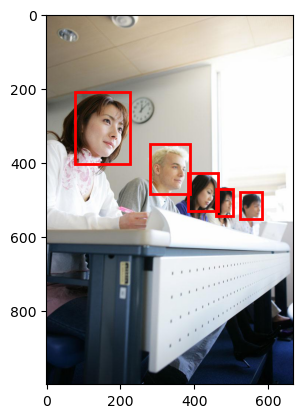

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_yolo(image_path, yolo_annotations_file):
    # Open the image
    img = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Read YOLO annotations from file
    with open(yolo_annotations_file, 'r') as f:
        yolo_annotations = f.read().splitlines()

    # Parse YOLO annotations and draw bounding boxes
    for annotation in yolo_annotations:
        class_name, x_center, y_center, width, height = annotation.split()
        x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)

        # Convert YOLO coordinates to image coordinates
        img_width, img_height = img.size
        xmin = int((x_center - width / 2) * img_width)
        ymin = int((y_center - height / 2) * img_height)
        xmax = int((x_center + width / 2) * img_width)
        ymax = int((y_center + height / 2) * img_height)

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)


    # Show the image with bounding boxes
    plt.show()

# Example usage
yolo_annotations_file = 'Annotations_Yolo/PartB_00002.txt'
image_file = 'C:\\Users\\nasser\\Desktop\\datasets\\SCUT_HEAD_Part_B\\JPEGImages\\PartB_00002.jpg'
visualize_yolo(image_file, yolo_annotations_file)
